#**Librerías**

In [1]:
from tensorflow.keras import datasets,layers,models,Sequential
from keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

#**Descargar la data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##**Vista de los datos**

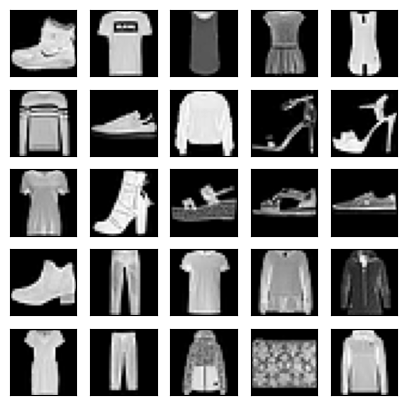

In [3]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]/255.0, cmap='gray')
plt.show()

##**Información del conjunto de datos**

In [4]:
cantidad_imagenes_train = train_images.shape[0]
cantidad_imagenes_test = test_images.shape[0]
num_pixeles = train_images.shape[1] * train_images.shape[2]      #Largo * Ancho de las imágenes
print("Cantidad de imágenes conjunto de entrenamiento %d" %cantidad_imagenes_train)
print("Cantidad de imágenes conjunto de test %d" %cantidad_imagenes_test)
print("Cantidad de pixeles %d" %num_pixeles)

Cantidad de imágenes conjunto de entrenamiento 60000
Cantidad de imágenes conjunto de test 10000
Cantidad de pixeles 784


##**Exploración de las etiquetas**

In [5]:
#print(train_labels)

#Conversión de las etiquetas a one hot encoding

train_labels = to_categorical(train_labels, num_classes = 10)

In [6]:
train_labels.shape

(60000, 10)

In [7]:
train_images.shape

(60000, 28, 28)

##**Redimensionar las imágenes para que considere la escala de grises**

In [8]:
train_images = train_images.reshape(-1,28,28,1)
test_images = test_images.reshape(-1,28,28,1)

#**Generación del modelo**

In [9]:
img_row = train_images.shape[1] #Cantidad de pixeles horizontales
img_col = train_images.shape[2] #Cantidad de pixeles verticales

#Generación del primer modelo

model_1 = Sequential()
model_1.add(Conv2D(10, kernel_size = 3, activation = 'relu', input_shape = (img_row,img_col,1),padding = 'same')) #Definición de la capa de entrada y la primera capa CNN
model_1.add(Conv2D(10,kernel_size = 3, activation = 'relu'))
model_1.add(Flatten())
model_1.add(Dense(10, activation = 'softmax')) #Definición de la capa de salida

#Compilación del primer modelo

model_1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Ajuste del modelo

training_1 = model_1.fit(train_images,train_labels,validation_split = 0.2, epochs = 10, batch_size = 32)





/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.7777 - loss: 1.4434 - val_accuracy: 0.8688 - val_loss: 0.3777
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 67s 30ms/step - accuracy: 0.8923 - loss: 0.3074 - val_accuracy: 0.8736 - val_loss: 0.3639
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9091 - loss: 0.2504 - val_accuracy: 0.8765 - val_loss: 0.3871
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9170 - loss: 0.2242 - val_accuracy: 0.8705 - val_loss: 0.4378
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9291 - loss: 0.1938 - val_accuracy: 0.8737 - val_loss: 0.4277
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9342 - loss: 0.1813 - val_accuracy: 0.8792 - val_loss: 0.4364
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9414 - loss: 0.1618 - val_accuracy: 0.8758 - val_loss: 0.4562
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.9427 -

##**Gráfico del conjunto de entrenamiento y validación para revisar el overfitting**

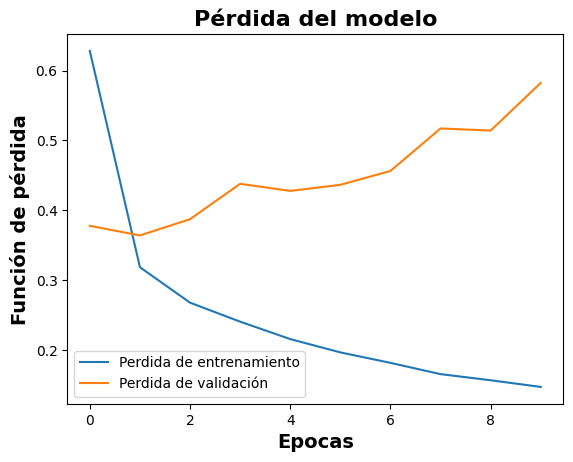

In [10]:
#El modelo muestra overfitting, mientras el conjunto de entrenamiento disminuye el % de pérdida, el conjunto de validación comienza aumentar su pérdida desde la 4 época

plt.plot(training_1.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_1.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 2**

Considerando que el primer modelo presentó un overfitting, se utilizará un callback que detenga el modelo cuando comience a disminuir la perdida en los datos de validación, además se utilizará la normalización por batches para evitar la overfitting

In [11]:
#Librerías

from keras.layers import BatchNormalization             #Normaliza la salida de los datos
from tensorflow.keras.callbacks import EarlyStopping    #Callback que detiene cuando baja la función de pérdida en los datos de validación

#Generación del segundo modelo

model_2 = Sequential()
model_2.add(Conv2D(10,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(10,kernel_size = 3,activation = 'relu'))
model_2.add(Flatten())
model_2.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_2 = model_2.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.8233 - loss: 0.5226 - val_accuracy: 0.8907 - val_loss: 0.3022
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9105 - loss: 0.2571 - val_accuracy: 0.8901 - val_loss: 0.3191
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9269 - loss: 0.2013 - val_accuracy: 0.8953 - val_loss: 0.3005
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 59s 40ms/step - accuracy: 0.9425 - loss: 0.1609 - val_accuracy: 0.8958 - val_loss: 0.3042
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 75s 35ms/step - accuracy: 0.9513 - loss: 0.1359 - val_accuracy: 0.8995 - val_loss: 0.3522
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 39ms/step - accuracy: 0.9574 - loss: 0.1166 - val_accuracy: 0.8942 - val_loss: 0.3644


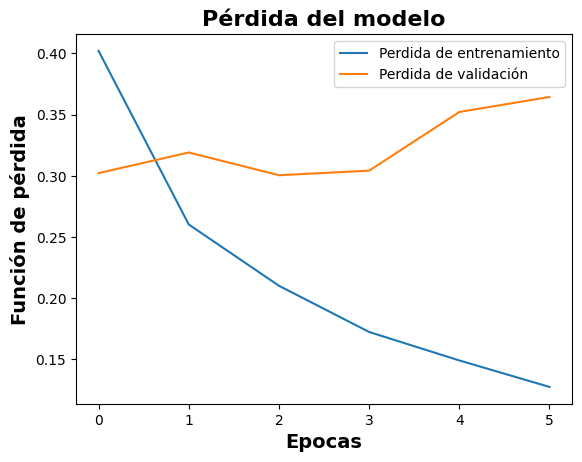

In [12]:
plt.plot(training_2.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_2.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 3** Aumentar el número de filtros al modelo anterior en la primera capa y comparar las métricas

In [13]:
#Generación del tercer modelo

model_3 = Sequential()
model_3.add(Conv2D(50,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_3.add(BatchNormalization())
model_3.add(Conv2D(10,kernel_size = 3,activation = 'relu'))
model_3.add(Flatten())
model_3.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_3.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_3 = model_3.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 136s 89ms/step - accuracy: 0.8274 - loss: 0.5079 - val_accuracy: 0.8732 - val_loss: 0.3510
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 135s 90ms/step - accuracy: 0.9017 - loss: 0.2768 - val_accuracy: 0.8964 - val_loss: 0.3026
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 87ms/step - accuracy: 0.9220 - loss: 0.2178 - val_accuracy: 0.8945 - val_loss: 0.3230
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 140s 93ms/step - accuracy: 0.9338 - loss: 0.1834 - val_accuracy: 0.8940 - val_loss: 0.3286
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 137s 90ms/step - accuracy: 0.9454 - loss: 0.1528 - val_accuracy: 0.8867 - val_loss: 0.3543


##**Gráfico del conjunto 3**

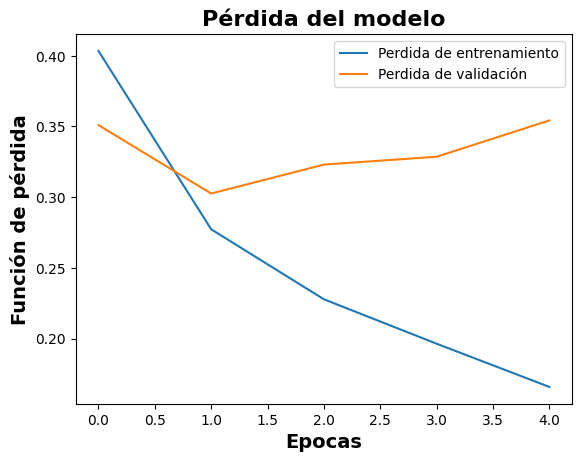

In [14]:
plt.plot(training_3.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_3.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 4** Se aumentó el número de filtros en la segunda capa convolucional y se redujo el número en el callback a 2 para evitar el overfitting

In [16]:
#Generación del tercer modelo

model_4 = Sequential()
model_4.add(Conv2D(50,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(50,kernel_size = 3,activation = 'relu'))
model_4.add(Flatten())
model_4.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_4.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 2,restore_best_weights = True)

#Ajuste del modelo

training_4 = model_4.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 220s 146ms/step - accuracy: 0.8230 - loss: 0.6054 - val_accuracy: 0.8668 - val_loss: 0.4048
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 268s 150ms/step - accuracy: 0.9076 - loss: 0.2583 - val_accuracy: 0.8942 - val_loss: 0.3079
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 252s 143ms/step - accuracy: 0.9323 - loss: 0.1881 - val_accuracy: 0.8878 - val_loss: 0.3418
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 279s 155ms/step - accuracy: 0.9482 - loss: 0.1414 - val_accuracy: 0.8903 - val_loss: 0.3590


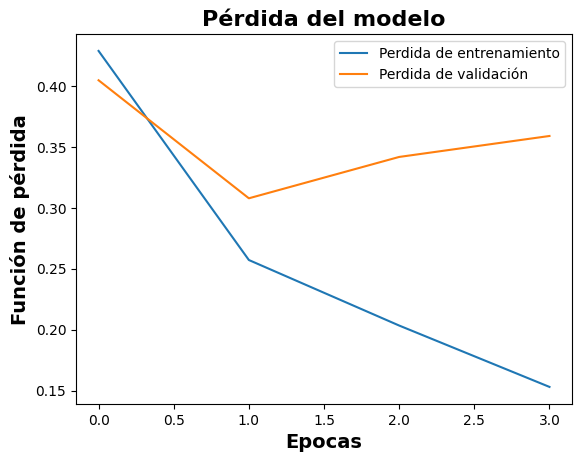

In [18]:
plt.plot(training_4.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_4.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 5 con solo 1 capa convolucional**

In [17]:

model_5 = Sequential()
model_5.add(Conv2D(10,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_5.add(BatchNormalization())
model_5.add(Flatten())
model_5.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_5.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_5 = model_5.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8114 - loss: 0.6406 - val_accuracy: 0.8751 - val_loss: 0.3614
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9006 - loss: 0.2813 - val_accuracy: 0.8890 - val_loss: 0.3362
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.9193 - loss: 0.2278 - val_accuracy: 0.8888 - val_loss: 0.3459
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9269 - loss: 0.2065 - val_accuracy: 0.8817 - val_loss: 0.3539
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9318 - loss: 0.1861 - val_accuracy: 0.8876 - val_loss: 0.3586


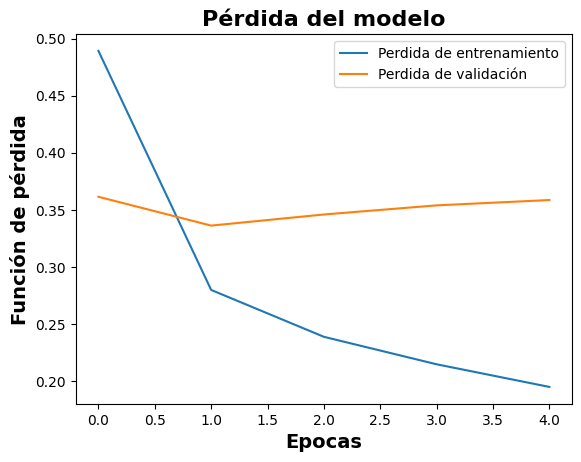

In [19]:
plt.plot(training_5.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_5.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 6 aumentando el número de filtros a 20**

In [24]:
model_6 = Sequential()
model_6.add(Conv2D(20,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_6.add(BatchNormalization())
model_6.add(Flatten())
model_6.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_6.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_6 = model_6.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.8151 - loss: 0.7942 - val_accuracy: 0.8733 - val_loss: 0.3861
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 26ms/step - accuracy: 0.9125 - loss: 0.2466 - val_accuracy: 0.8947 - val_loss: 0.3193
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9319 - loss: 0.1912 - val_accuracy: 0.8945 - val_loss: 0.3395
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9419 - loss: 0.1626 - val_accuracy: 0.8913 - val_loss: 0.3604
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.9497 - loss: 0.1424 - val_accuracy: 0.8759 - val_loss: 0.4215


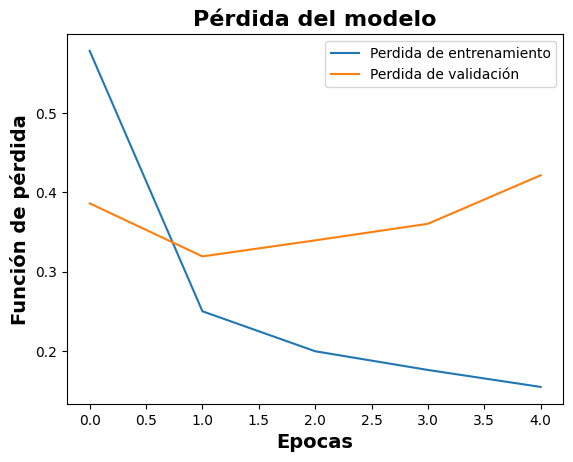

In [25]:
plt.plot(training_6.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_6.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 7 probando con Dropout**

In [21]:
from keras.layers import Dropout

model_7 = Sequential()
model_7.add(Conv2D(10,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_7.add(Dropout(0.2))
model_7.add(Flatten())
model_7.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_7.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_7 = model_7.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7533 - loss: 8.2268 - val_accuracy: 0.8588 - val_loss: 0.4130
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.8671 - loss: 0.3800 - val_accuracy: 0.8705 - val_loss: 0.3808
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 17ms/step - accuracy: 0.8858 - loss: 0.3199 - val_accuracy: 0.8708 - val_loss: 0.3765
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.8938 - loss: 0.2950 - val_accuracy: 0.8684 - val_loss: 0.3752
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9001 - loss: 0.2705 - val_accuracy: 0.8698 - val_loss: 0.3861
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9032 - loss: 0.2602 - val_accuracy: 0.8761 - val_loss: 0.3858
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9066 - loss: 0.2540 - val_accuracy: 0.8733 - val_loss: 0.3971


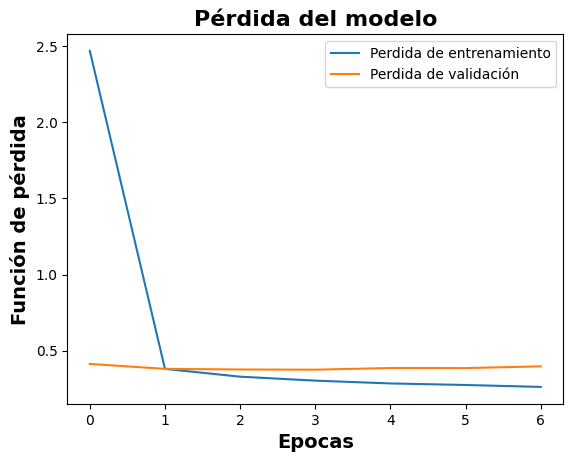

In [23]:
plt.plot(training_7.history['loss'], label = 'Perdida de entrenamiento')
plt.plot(training_7.history['val_loss'], label = 'Perdida de validación')
plt.title("Pérdida del modelo",fontsize = 16, fontweight = 'bold')
plt.xlabel("Epocas",fontsize = 14, fontweight = 'bold')
plt.ylabel("Función de pérdida",fontsize = 14, fontweight = 'bold')
plt.legend()
plt.show()

##**Modelo 6**

In [ ]:
model_6 = Sequential()
model_6.add(Conv2D(20,kernel_size = 3,activation = 'relu',input_shape = (img_row,img_col,1),padding = 'same'))
model_6.add(Dropout(0.2))
model_6.add(Conv2D(10,kernel_size = 3,activation = 'relu'))
model_6.add(Flatten())
model_6.add(Dense(10,activation = 'softmax'))

#Compilación del modelo

model_6.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

#Configuración del callback

early_stopping = EarlyStopping(monitor = 'val_loss',patience = 3,restore_best_weights = True)

#Ajuste del modelo

training_6 = model_6.fit(train_images,train_labels,validation_split = 0.2,epochs = 10,callbacks = [early_stopping], batch_size = 32)